# **Option 1: Predicting the severity of road accidents in the UK.**

In [ ]:
#importing needed libraries
import numpy as np
import pandas as pd 
import requests 
import io
import matplotlib.pyplot as plt
import sklearn.linear_model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn import kernel_ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
import seaborn as sns 
sns.set()
from IPython.display import HTML
def pretty_print_df(value_counts_):
  "Quick function to display value counts more nicely"
  display(HTML(pd.DataFrame(value_counts_).to_html()))
from sklearn.compose import ColumnTransformer


In [ ]:
#importing data
url="https://raw.githubusercontent.com/99Bella/COMP1832Irisdataset/main/OPTION1_uk_road_accident_2019_coursework_final.csv"
download= requests.get(url).content
Data = pd.read_csv(io.StringIO(download.decode('utf-8')))

# Cleaning and Inspecting data

In [ ]:
#Inspection of Dataset
print(Data.shape)
print(Data.columns)
print(Data.dtypes)
Data.head(10)

(31647, 14)
Index(['accident_index', 'speed_limit', 'light_conditions',
       'weather_conditions', 'road_surface_conditions', 'vehicle_type',
       'junction_location', 'skidding_and_overturning',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       'first_point_of_impact', 'sex_of_driver', 'age_of_oldest_driver',
       'accident_severity'],
      dtype='object')
accident_index                  object
speed_limit                      int64
light_conditions                object
weather_conditions              object
road_surface_conditions         object
vehicle_type                    object
junction_location               object
skidding_and_overturning        object
vehicle_leaving_carriageway     object
hit_object_off_carriageway      object
first_point_of_impact           object
sex_of_driver                   object
age_of_oldest_driver           float64
accident_severity               object
dtype: object


,accident_index,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_oldest_driver,accident_severity
0,2019010225080,30,darkness,other,wet or damp,at least one van,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,63.0,serious
1,2019200908684,30,darkness,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,at least one vehicle leaving carriageway,at least one vehicle hit an object,at least one vehicle with frontal impact,all males,82.0,fatal
2,2019040860897,40,daylight,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,data missing or out of range,NaN,serious
3,2019460847205,40,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,male and female,NaN,serious
4,2019051911581,30,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all females,39.0,slight
5,2019400862270,60,daylight,fine,dry,at least one biped,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,male and female,NaN,serious
6,2019420894599,30,darkness,fine,wet or damp,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,40.0,fatal
7,2019010162791,50,daylight,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,57.0,slight
8,2019360909153,60,daylight,fine,dry,at least one van,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,57.0,fatal
9,2019500856761,60,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,at least one vehicle leaving carriageway,at least one vehicle hit an object,at least one vehicle with frontal impact,male and female,60.0,fatal


In [ ]:
Data.describe()


,speed_limit,age_of_oldest_driver
count,31647.000000,25197.000000
mean,36.572029,47.254038
std,13.837362,16.779656
min,-1.000000,6.000000
25%,30.000000,34.000000
50%,30.000000,47.000000
75%,40.000000,59.000000
max,70.000000,101.000000


In [ ]:
# let's list all categorical features
categorical_columns= ['light_conditions',
       'weather_conditions', 'road_surface_conditions', 'vehicle_type',
       'junction_location', 'skidding_and_overturning',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       'first_point_of_impact', 'sex_of_driver',
       'accident_severity']

# let's get the categories and their count for each feature
for col in categorical_columns:
  print(f"Categories and number of occurrences for '{col}'")
  pretty_print_df(Data[col].value_counts())
  print()

Categories and number of occurrences for 'light_conditions'


,light_conditions
daylight,22210
darkness,9437



Categories and number of occurrences for 'weather_conditions'


,weather_conditions
fine,25152
other,5407
data missing or out of range,970
fog or mist,118



Categories and number of occurrences for 'road_surface_conditions'


,road_surface_conditions
dry,22092
wet or damp,8761
other,374
data missing or out of range,365
flood over 3cm. deep,55



Categories and number of occurrences for 'vehicle_type'


,vehicle_type
only cars,17487
at least one biped,8662
at least one van,4040
biped and van,1000
other,395
data missing or out of range,63



Categories and number of occurrences for 'junction_location'


,junction_location
at or within 20 metres of junction,17204
not at or within 20 metres of junction,12973
data missing or out of range,1470



Categories and number of occurrences for 'skidding_and_overturning'


,skidding_and_overturning
no skidding or overturning,24387
at least one vehicle skidded or overturned,5226
data missing or out of range,2034



Categories and number of occurrences for 'vehicle_leaving_carriageway'


,vehicle_leaving_carriageway
none leaving carriageway,24019
at least one vehicle leaving carriageway,5661
data missing or out of range,1967



Categories and number of occurrences for 'hit_object_off_carriageway'


,hit_object_off_carriageway
none hit an object,26129
at least one vehicle hit an object,3655
data missing or out of range,1863



Categories and number of occurrences for 'first_point_of_impact'


,first_point_of_impact
at least one vehicle with frontal impact,23002
other points of impact,6008
no impact,1333
data missing or out of range,1304



Categories and number of occurrences for 'sex_of_driver'


,sex_of_driver
all males,15494
male and female,7015
data missing or out of range,5122
all females,4016



Categories and number of occurrences for 'accident_severity'


,accident_severity
slight,12672
serious,11592
fatal,6159
Serious,25
Slight,19
Fatal,8


In [ ]:
Data.loc[Data.accident_severity=='slight','accident_severity'] = 'Slight'
Data.loc[Data.accident_severity=='serious','accident_severity'] = 'Serious'
Data.loc[Data.accident_severity=='fatal','accident_severity'] = 'Fatal'

Data.loc[Data.weather_conditions== 'data missing or out of range','weather_conditions']= np.nan
Data.loc[Data.road_surface_conditions== 'data missing or out of range','road_surface_conditions']= np.nan
Data.loc[Data.vehicle_type== 'data missing or out of range','vehicle_type']= np.nan
Data.loc[Data.junction_location== 'data missing or out of range','junction_location']= np.nan
Data.loc[Data.skidding_and_overturning== 'data missing or out of range','skidding_and_overturning']= np.nan
Data.loc[Data.vehicle_leaving_carriageway== 'data missing or out of range','vehicle_leaving_carriageway']= np.nan
Data.loc[Data.hit_object_off_carriageway== 'data missing or out of range','hit_object_off_carriageway']= np.nan
Data.loc[Data.first_point_of_impact== 'data missing or out of range','first_point_of_impact']= np.nan
Data.loc[Data.sex_of_driver== 'data missing or out of range','sex_of_driver']= np.nan

In [ ]:
DataA= Data.copy()
Im1= SimpleImputer(missing_values= np.nan, strategy='most_frequent') #dealing with missing values in categorical
Im1= Im1.fit(DataA[categorical_columns])
DataA[categorical_columns]= Im1.transform(DataA[categorical_columns])

DataA

,accident_index,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_oldest_driver,accident_severity
0,2019010225080,30,darkness,other,wet or damp,at least one van,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,63.0,Serious
1,2019200908684,30,darkness,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,at least one vehicle leaving carriageway,at least one vehicle hit an object,at least one vehicle with frontal impact,all males,82.0,Fatal
2,2019040860897,40,daylight,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,NaN,Serious
3,2019460847205,40,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,male and female,NaN,Serious
4,2019051911581,30,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all females,39.0,Slight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,2019070317173,30,darkness,fine,wet or damp,at least one biped,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,27.0,Serious
31643,2019970892077,60,daylight,fine,dry,other,at or within 20 metres of junction,at least one vehicle skidded or overturned,none leaving carriageway,none hit an object,other points of impact,all males,27.0,Serious
31644,20191369p0654,70,daylight,fine,dry,at least one van,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,67.0,Slight
31645,2019470903814,30,darkness,fine,wet or damp,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,24.0,Fatal


In [ ]:
DataA.duplicated().sum()

1172

In [ ]:
Data2= DataA.drop_duplicates()
Data2.head()

,accident_index,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_oldest_driver,accident_severity
0,2019010225080,30,darkness,other,wet or damp,at least one van,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,63.0,Serious
1,2019200908684,30,darkness,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,at least one vehicle leaving carriageway,at least one vehicle hit an object,at least one vehicle with frontal impact,all males,82.0,Fatal
2,2019040860897,40,daylight,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,NaN,Serious
3,2019460847205,40,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,male and female,NaN,Serious
4,2019051911581,30,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all females,39.0,Slight


In [ ]:
Data2.isna().sum()

accident_index                    0
speed_limit                       0
light_conditions                  0
weather_conditions                0
road_surface_conditions           0
vehicle_type                      0
junction_location                 0
skidding_and_overturning          0
vehicle_leaving_carriageway       0
hit_object_off_carriageway        0
first_point_of_impact             0
sex_of_driver                     0
age_of_oldest_driver           6235
accident_severity                 0
dtype: int64

In [ ]:
DataB= Data2.drop(["accident_index"], axis=1) #dropping accident index because unique number
c_data= DataB.copy()
Im2 = SimpleImputer(missing_values = np.nan, strategy = 'median')  

# 2. Fit the imputer object to the feature matrix (only for numeric features)
numerical_columns = ['age_of_oldest_driver']
Im2 = Im2.fit(c_data[numerical_columns]) # fit the data to estimate the parameters (here, the average value)

# 3. Call Transform to replace missing data in train_dataset (on specific columns) by the mean of the column to which that missing data belongs to
c_data[numerical_columns] = \
  Im2.transform(c_data[numerical_columns]) # apply the transformation using the parameters estimated above

# note column ApplicantIncome in the first row --> before it was a missing value!
c_data.isna().sum()



speed_limit                    0
light_conditions               0
weather_conditions             0
road_surface_conditions        0
vehicle_type                   0
junction_location              0
skidding_and_overturning       0
vehicle_leaving_carriageway    0
hit_object_off_carriageway     0
first_point_of_impact          0
sex_of_driver                  0
age_of_oldest_driver           0
accident_severity              0
dtype: int64

In [ ]:
print(c_data.columns)
c_data.shape

Index(['speed_limit', 'light_conditions', 'weather_conditions',
       'road_surface_conditions', 'vehicle_type', 'junction_location',
       'skidding_and_overturning', 'vehicle_leaving_carriageway',
       'hit_object_off_carriageway', 'first_point_of_impact', 'sex_of_driver',
       'age_of_oldest_driver', 'accident_severity'],
      dtype='object')


(30475, 13)

In [ ]:
lblEncoder_X = LabelEncoder()   
# apply LblEncoder object to our categorical variables to get numerical 
c_data['light_conditions'] = lblEncoder_X.fit_transform(c_data['light_conditions'])
c_data['junction_location'] = lblEncoder_X.fit_transform(c_data['junction_location'])
c_data['skidding_and_overturning'] = lblEncoder_X.fit_transform(c_data['skidding_and_overturning'])
c_data['hit_object_off_carriageway'] = lblEncoder_X.fit_transform(c_data['hit_object_off_carriageway'])
c_data['vehicle_leaving_carriageway'] = lblEncoder_X.fit_transform(c_data['vehicle_leaving_carriageway'])
c_data['accident_severity'] = lblEncoder_X.fit_transform(c_data['accident_severity'])


categorical_columns= [
       'weather_conditions', 'road_surface_conditions', 'vehicle_type',
       'first_point_of_impact', 'sex_of_driver']

data_fr = pd.get_dummies(c_data, columns = categorical_columns)
data_fr


,speed_limit,light_conditions,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,age_of_oldest_driver,accident_severity,weather_conditions_fine,weather_conditions_fog or mist,...,vehicle_type_at least one van,vehicle_type_biped and van,vehicle_type_only cars,vehicle_type_other,first_point_of_impact_at least one vehicle with frontal impact,first_point_of_impact_no impact,first_point_of_impact_other points of impact,sex_of_driver_all females,sex_of_driver_all males,sex_of_driver_male and female
0,30,0,0,1,1,1,63.0,1,0,0,...,1,0,0,0,0,0,1,0,1,0
1,30,0,0,1,0,0,82.0,0,1,0,...,0,0,1,0,1,0,0,0,1,0
2,40,1,0,1,1,1,47.0,1,1,0,...,0,0,1,0,1,0,0,0,1,0
3,40,1,1,1,1,1,47.0,1,1,0,...,0,0,1,0,1,0,0,0,0,1
4,30,1,1,1,1,1,39.0,2,1,0,...,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,30,0,1,1,1,1,27.0,1,1,0,...,0,0,0,0,1,0,0,0,1,0
31643,60,1,0,0,1,1,27.0,1,1,0,...,0,0,0,1,0,0,1,0,1,0
31644,70,1,1,1,1,1,67.0,2,1,0,...,1,0,0,0,1,0,0,0,1,0
31645,30,0,1,1,1,1,24.0,0,1,0,...,0,0,1,0,0,0,1,0,1,0


In [ ]:
data_fr.accident_severity.value_counts() #need to perform some sampling at some point

2    13362
1    11180
0     5933
Name: accident_severity, dtype: int64

In [ ]:
print(data_fr.columns)

Index(['speed_limit', 'light_conditions', 'junction_location',
       'skidding_and_overturning', 'vehicle_leaving_carriageway',
       'hit_object_off_carriageway', 'age_of_oldest_driver',
       'accident_severity', 'weather_conditions_fine',
       'weather_conditions_fog or mist', 'weather_conditions_other',
       'road_surface_conditions_dry',
       'road_surface_conditions_flood over 3cm. deep',
       'road_surface_conditions_other', 'road_surface_conditions_wet or damp',
       'vehicle_type_at least one biped', 'vehicle_type_at least one van',
       'vehicle_type_biped and van', 'vehicle_type_only cars',
       'vehicle_type_other',
       'first_point_of_impact_at least one vehicle with frontal impact',
       'first_point_of_impact_no impact',
       'first_point_of_impact_other points of impact',
       'sex_of_driver_all females', 'sex_of_driver_all males',
       'sex_of_driver_male and female'],
      dtype='object')


In [ ]:

#splitting to feature and target
col =['speed_limit', 'light_conditions', 'junction_location',
       'skidding_and_overturning', 'vehicle_leaving_carriageway',
       'hit_object_off_carriageway', 'age_of_oldest_driver',
       'weather_conditions_fine',
       'weather_conditions_fog or mist', 'weather_conditions_other',
       'road_surface_conditions_dry',
       'road_surface_conditions_flood over 3cm. deep',
       'road_surface_conditions_other', 'road_surface_conditions_wet or damp',
       'vehicle_type_at least one biped', 'vehicle_type_at least one van',
       'vehicle_type_biped and van', 'vehicle_type_only cars',
       'vehicle_type_other',
       'first_point_of_impact_at least one vehicle with frontal impact',
       'first_point_of_impact_no impact',
       'first_point_of_impact_other points of impact',
       'sex_of_driver_all females', 'sex_of_driver_all males',
       'sex_of_driver_male and female']
#col
data =(data_fr[col]) #feature Matrix
target = (data_fr['accident_severity']) #target 

# PCA

In [ ]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(data, target, 
                                                                  test_size=0.2, random_state=0,
                                                                  stratify = target)


<ipython-input-18-2c8edf884af5>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure() # we create a new figure for each plot


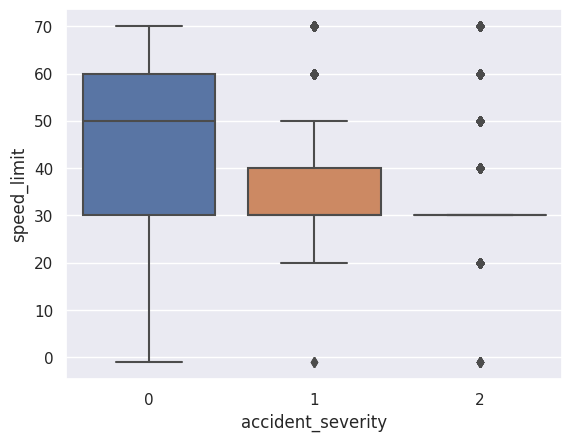

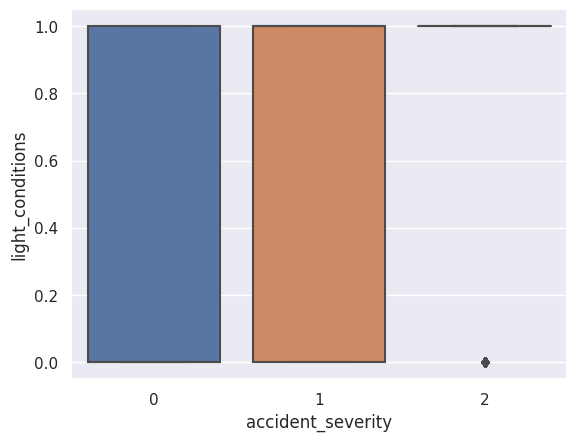

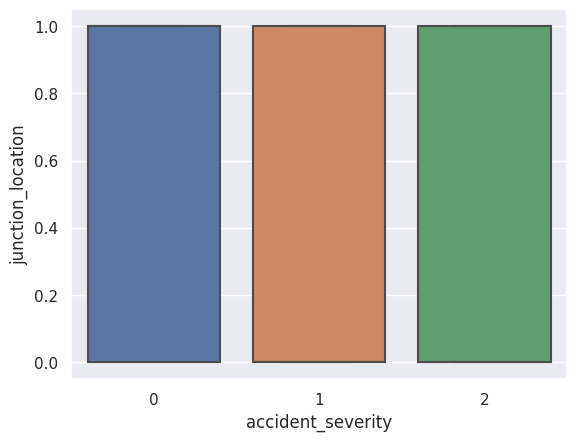

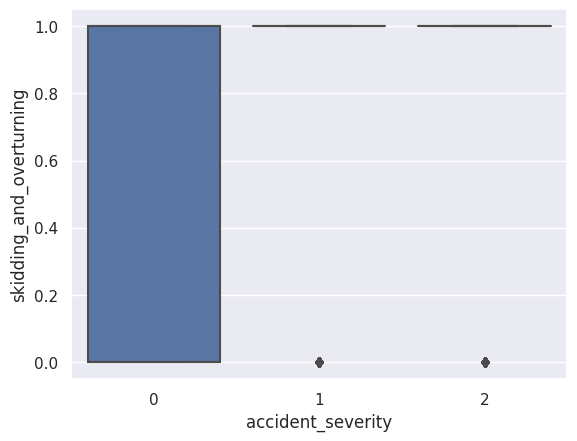

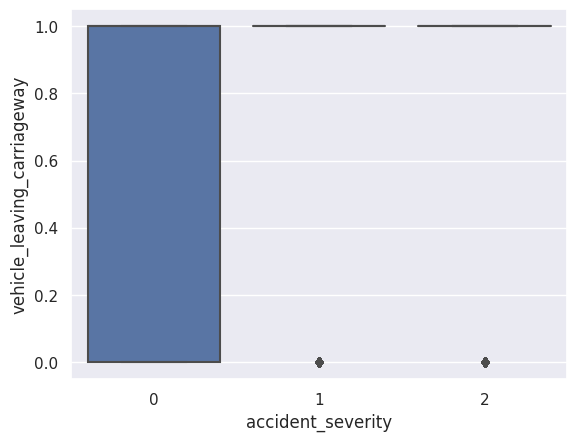

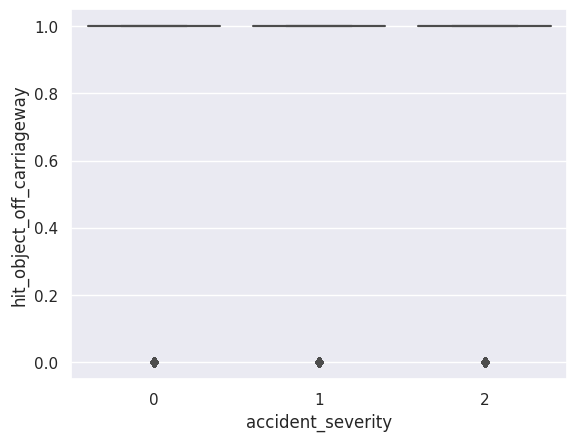

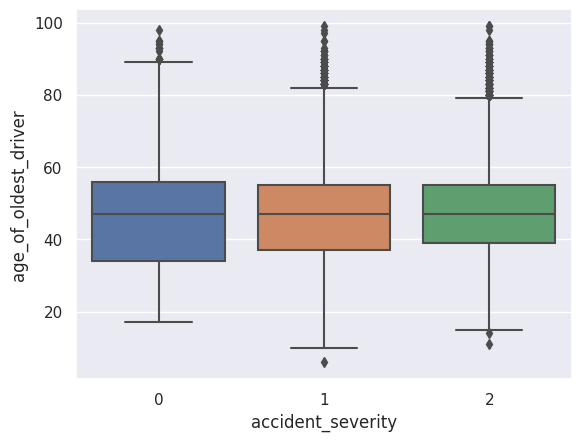

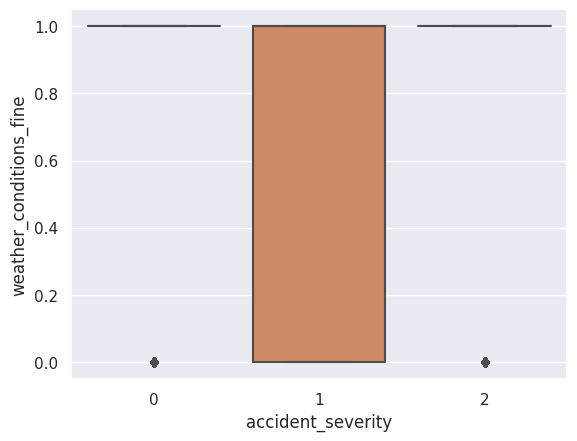

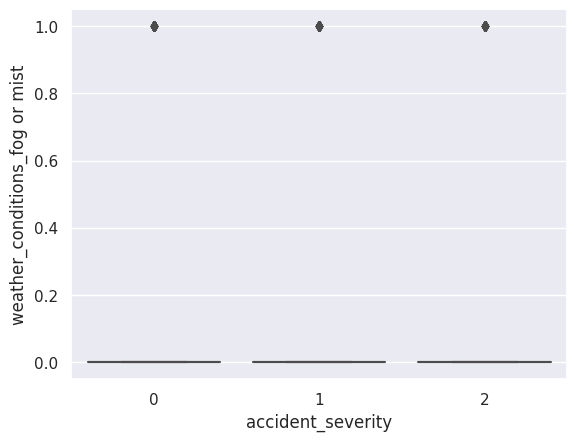

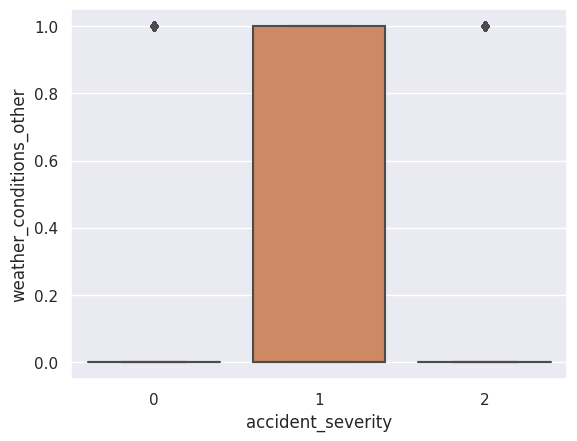

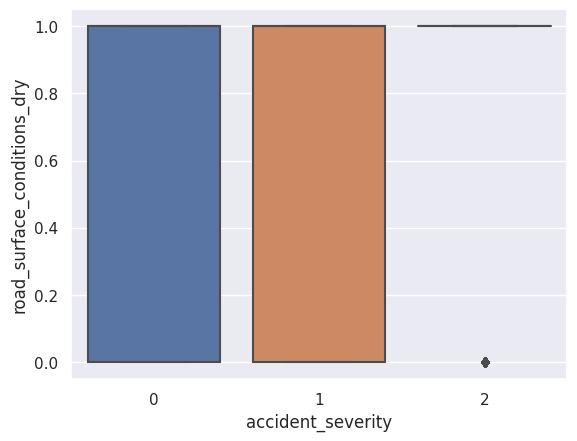

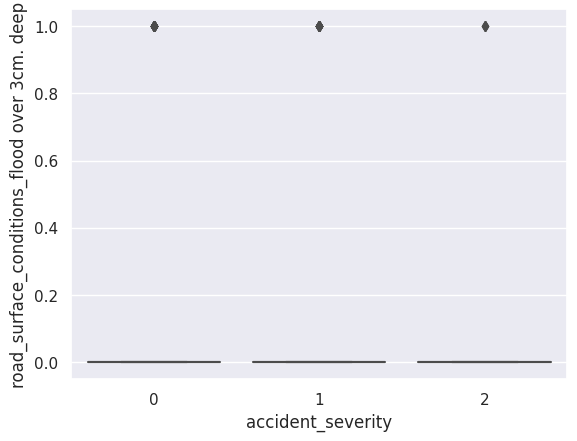

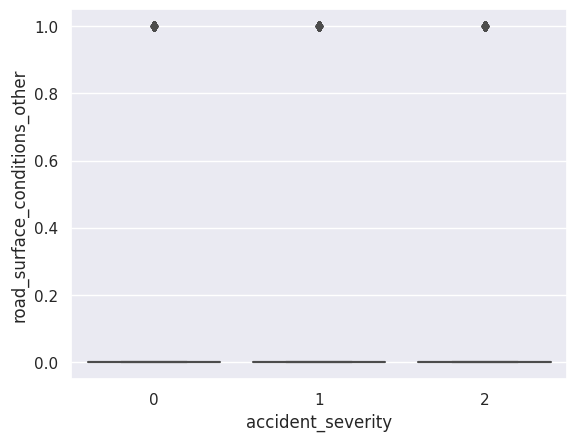

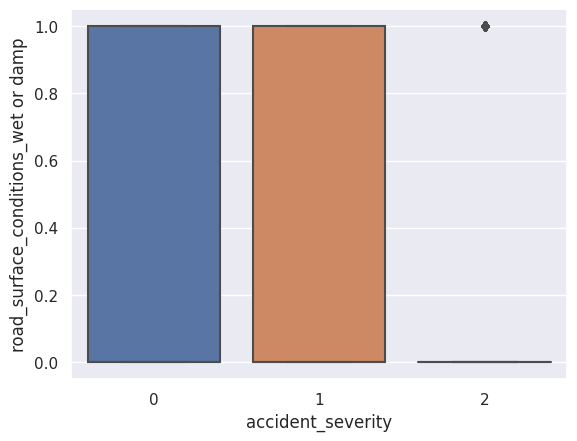

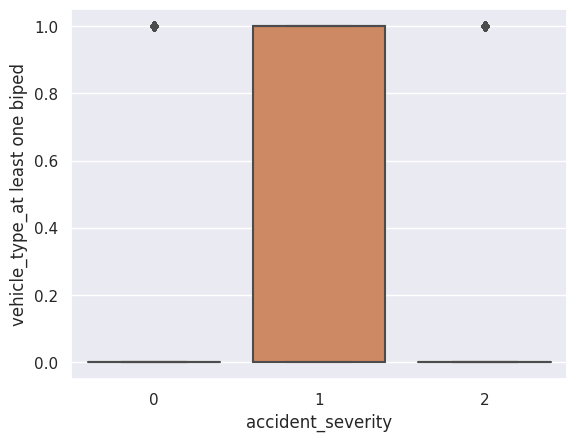

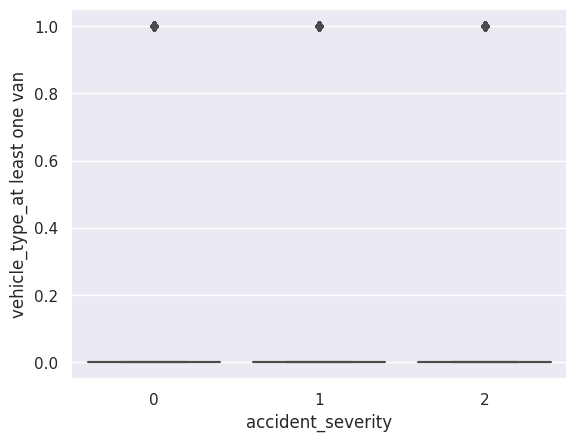

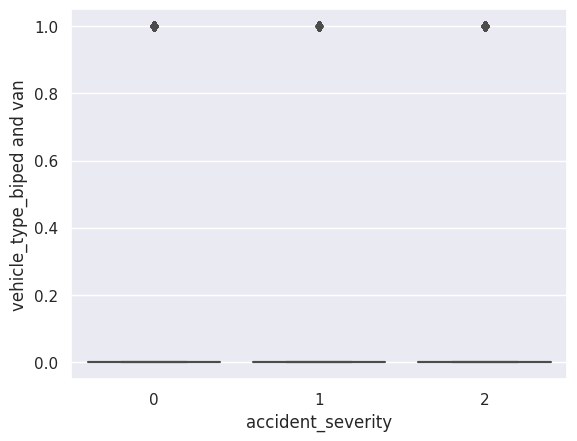

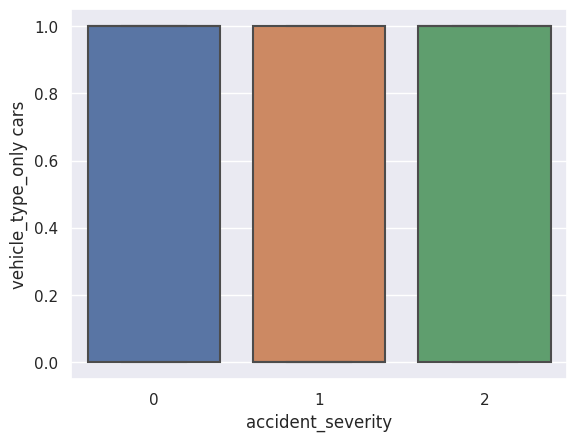

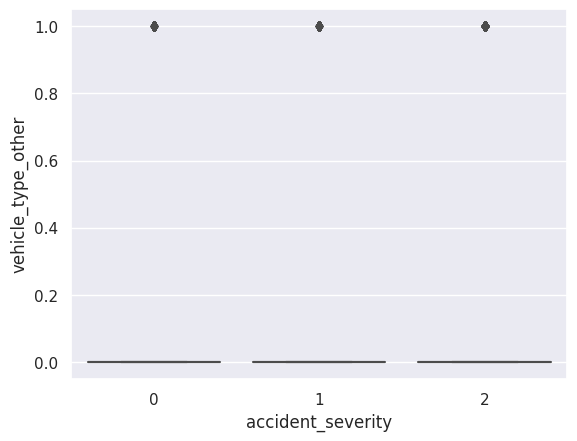

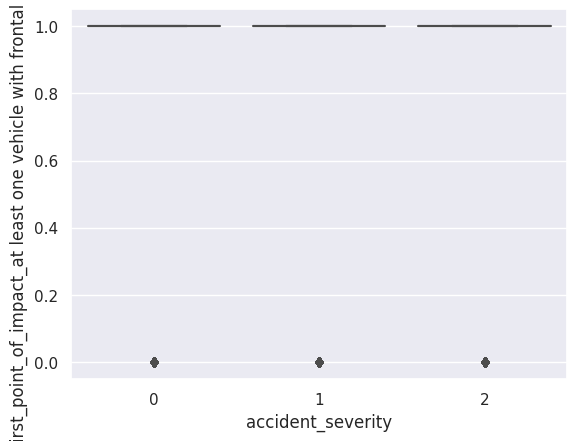

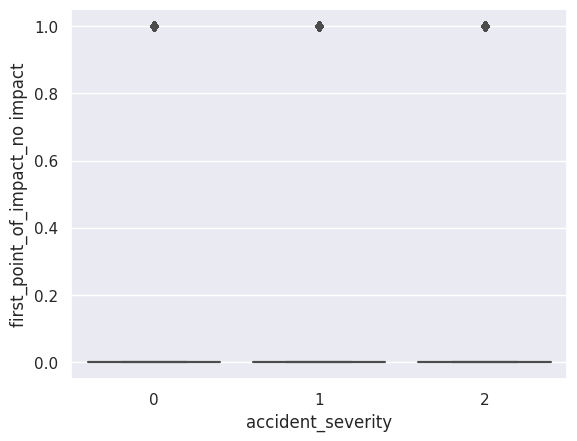

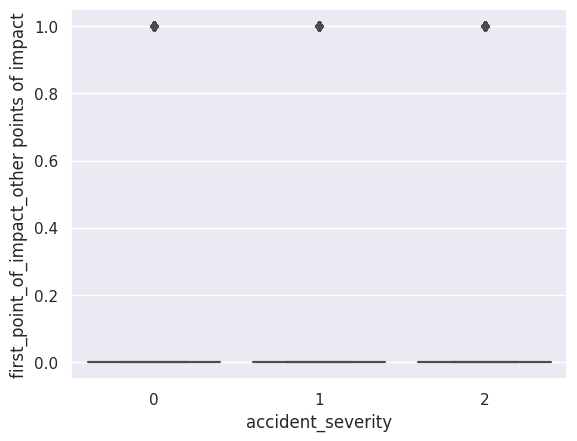

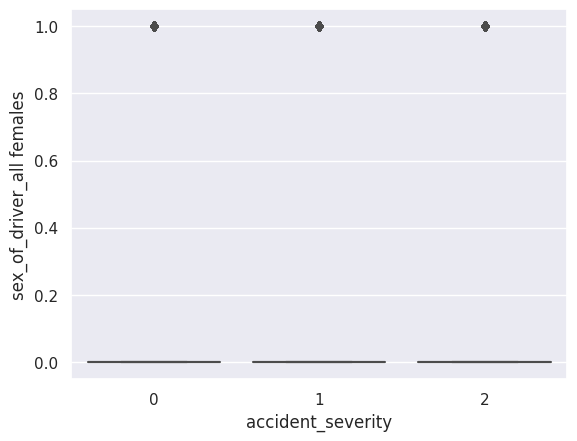

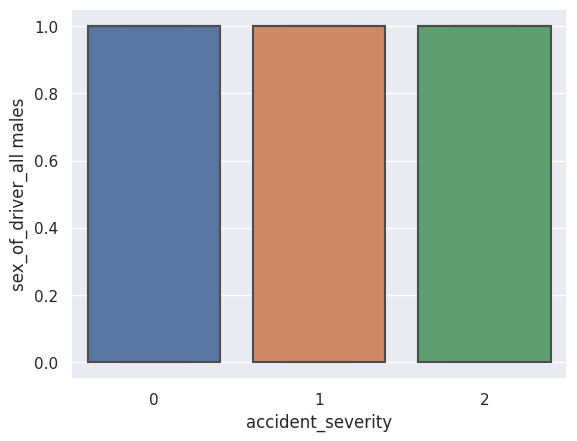

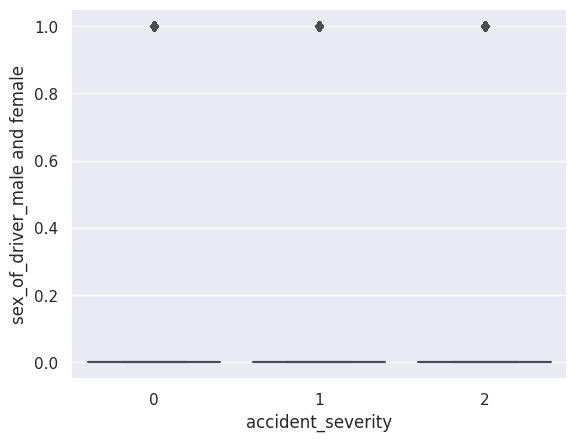

In [ ]:
for col in data_train.columns:
    plt.figure() # we create a new figure for each plot
    sns.boxplot(y=data_train[col], x= target_train) 
    # the line above means that we show the distribution of each input feature on the y axis
    # (that is, you will see vertical box plots), split by their target label (which
    # will appear on the horizontal axis)
    

In [ ]:
#PCA
scaler = StandardScaler().set_output(transform="pandas") 
# something new that I just discovered: we can ask scikit-learn to return the transformed data in pandas format!

# remember that we fit on training only and transform both training and test
scaled_data_train = scaler.fit_transform(data_train)
scaled_data_test = scaler.transform(data_test)

Explained Variances: {2: 0.234, 3: 0.321, 4: 0.394, 5: 0.459, 6: 0.511, 7: 0.556, 8: 0.599, 9: 0.642, 10: 0.683, 11: 0.723, 12: 0.763, 13: 0.802, 14: 0.84, 15: 0.877, 16: 0.909, 17: 0.938, 18: 0.965, 19: 0.99}



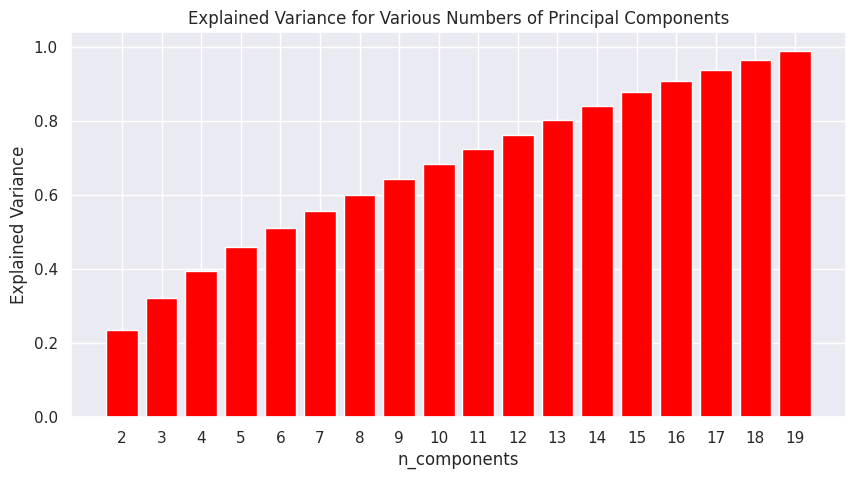

In [ ]:
from sklearn.decomposition import PCA

# checking with various n_components of PCA
# and storing the result -- cumulative variance explained by the transformed features
comp_num_lst = range(2,20) 
var_exp_lst = []
# we build multiple PCA models, each with a different number of principal components we choose to retain
for comp_num in comp_num_lst:
    # initialize PCA object and specify the number of PCA feature to get
    pca = PCA(n_components=comp_num)
    pca = pca.fit(scaled_data_train)
    var_exp_lst.append(np.sum(pca.explained_variance_ratio_))

 #this is an auxiliary variable to build a proper horizontal axis
ind = [i for i in range(len(comp_num_lst))]

fig = plt.figure(figsize=(10, 5))
ax1 = plt.subplot(111)
# we want as many bars as there are PCA models we tried
_ = ax1.set_xticks(ind)
_ = ax1.set_xticklabels(comp_num_lst)
_ = ax1.bar(ind, var_exp_lst, width=0.8, color='red')
_ = ax1.set_title('Explained Variance for Various Numbers of Principal Components')
_ = ax1.set_xlabel('n_components')
_ = ax1.set_ylabel('Explained Variance')

print('Explained Variances: {}'.format(dict(zip(comp_num_lst, [np.around(t,3) for t in var_exp_lst]))))
print()
#plt.show()



In [ ]:
pca = PCA(n_components=.80)
pca_transform = pca.fit_transform(scaled_data_train)
print(f'We need {len(pca.explained_variance_ratio_)} components to explain at least 80% of the variance')

# Note that explained_variance_ratio_ returns the amount of variance explained by each successive principal component


We need 13 components to explain at least 80% of the variance


In [ ]:
# let's do PCA with two components
pca_viz = PCA(n_components=2)
pca_viz_transform = pca_viz.fit_transform(scaled_data_train)

<ipython-input-23-a47ddc693114>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap("tab10")(np.linspace(0,1,len(classes_)))


Text(0.5, 1.0, 'PCA 1 Vs PCA 2')

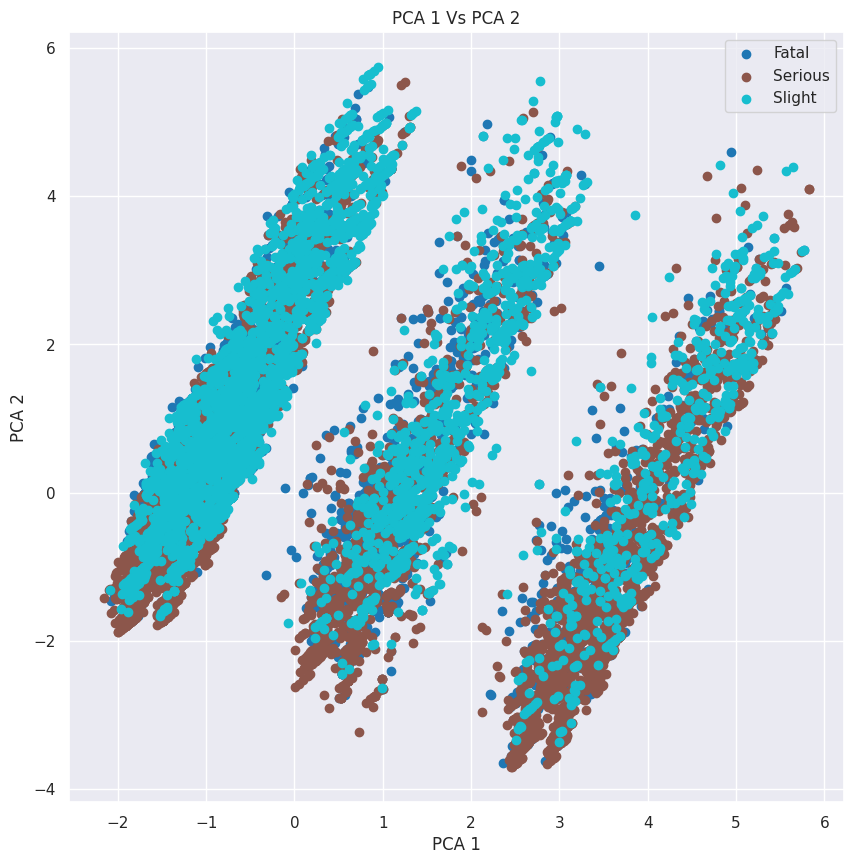

In [ ]:
classes_ = target_train.value_counts().index

# let's get 3 different colors to recognize the different classes
from matplotlib import cm 
colors = cm.get_cmap("tab10")(np.linspace(0,1,len(classes_)))

plt.figure(figsize=(10,10))
for target_class,color in zip(classes_, colors):
    # let's only plot the transformed data points for a given label
    plt.scatter(pca_viz_transform[target_train==target_class,0],
                pca_viz_transform[target_train==target_class,1],
                label=target_class,
                color=color)
plt.legend( ['Fatal', 'Serious', 'Slight'])
plt.xlabel('PCA 1') 
plt.ylabel('PCA 2')
plt.title('PCA 1 Vs PCA 2')
#classes are not well separated, this might be a problem that cant be solved linearly... (, PCA is a linear transformation)

# Preprocessing for Classification

In [ ]:
#preprocessing steps 
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.datasets import make_classification

In [ ]:
X= np.array(data.iloc[:, 0:13])
#X = np.array(data) #feature Matrix, Can keep first 13 features according to PCA 
y = np.array(target) #target 
rus = RandomUnderSampler(random_state=0)  #dealing with data imbalances decided to undersample bc domt wanna assume new data so worked with i had, made the selection random
X_raw, Y = rus.fit_resample(X, y)
print(sorted(Counter(Y).items()))

[(0, 5933), (1, 5933), (2, 5933)]


In [ ]:
# Split the data- Train/Validation/Test 
X_nontest_raw, X_test_raw, Y_nontest, Y_test = train_test_split(X_raw, Y, test_size=0.20, shuffle=True, random_state=0)
X_train_raw, X_valid_raw, Y_train, Y_valid = train_test_split(X_nontest_raw, Y_nontest, test_size=0.25, shuffle=True, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train_raw)
X_train = scaler.transform(X_train_raw)
X_valid = scaler.transform(X_valid_raw)
X_test = scaler.transform(X_test_raw)

print('The shape of `X_train`:', X_train.shape)
print('The shape of `X_valid`:', X_valid.shape)
print('The shape of `X_test`:', X_test.shape)

The shape of `X_train`: (10679, 13)
The shape of `X_valid`: (3560, 13)
The shape of `X_test`: (3560, 13)


# **Classification**

In [ ]:
#importing needed libraries 
import scipy
import sklearn.svm 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings
warnings.simplefilter("ignore")


# Trying out different classifications 

In [ ]:
clfs = []
clfs.append(SVC())
clfs.append(KNeighborsClassifier(n_neighbors=3))
clfs.append(DecisionTreeClassifier())
clfs.append(RandomForestClassifier()) #all classifiers on default hyperparameters

for classifier in clfs:
    model = classifier
    #Train
    model.fit(X_train, Y_train)
    #Validate
    Y_pred_valid= model.predict(X_valid)
    #Test
    Y_pred_test = model.predict(X_test)
    print('---------------------------------')
    print(str(classifier))
    print('-----------------------------------')
    # 3. evaluate
    print('Accuracy on Validation: {:.4f}'.format(sklearn.metrics.accuracy_score(Y_valid, Y_pred_valid)))
    print('Accuracy on Test: {:.4f}'.format(sklearn.metrics.accuracy_score(Y_test, Y_pred_test)))
    # Confusion matrix
    confusion_mat = sklearn.metrics.confusion_matrix(Y_test,Y_pred_test, normalize='all')
    print('Confusion matrix: ', confusion_mat)
    print(sklearn.metrics.classification_report(Y_test, Y_pred_test))

---------------------------------
SVC()
-----------------------------------
Accuracy on Validation: 0.6219
Accuracy on Test: 0.6065
Confusion matrix:  [[0.27275281 0.01910112 0.02893258]
 [0.11797753 0.09382022 0.12696629]
 [0.05842697 0.04213483 0.23988764]]
              precision    recall  f1-score   support

           0       0.61      0.85      0.71      1142
           1       0.61      0.28      0.38      1206
           2       0.61      0.70      0.65      1212

    accuracy                           0.61      3560
   macro avg       0.61      0.61      0.58      3560
weighted avg       0.61      0.61      0.58      3560

---------------------------------
KNeighborsClassifier(n_neighbors=3)
-----------------------------------
Accuracy on Validation: 0.5573
Accuracy on Test: 0.5261
Confusion matrix:  [[0.21629213 0.0752809  0.02921348]
 [0.10730337 0.1238764  0.10758427]
 [0.06320225 0.09129213 0.18595506]]
              precision    recall  f1-score   support

           0  

From the above we can see that SVC folloed by RandomForest are the best classifier, now to put it on GridSearch to find best parameters. 

0.5973419203747072 {'class_weight': None, 'max_depth': 4, 'n_estimators': 10}
              precision    recall  f1-score   support

           0       0.61      0.84      0.71      1142
           1       0.61      0.30      0.40      1206
           2       0.61      0.71      0.65      1212

    accuracy                           0.61      3560
   macro avg       0.61      0.62      0.59      3560
weighted avg       0.61      0.61      0.59      3560


 Balanced accuracy is 0.6153761305851507


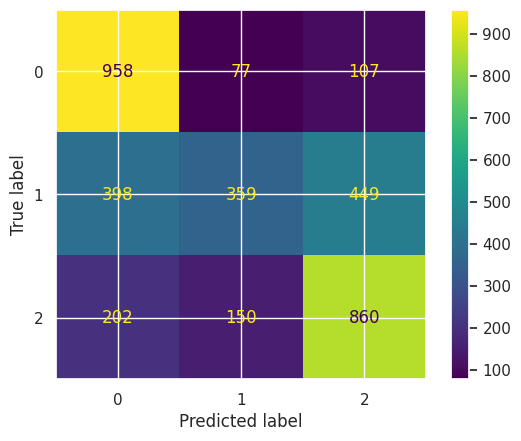

In [ ]:
clf_= RandomForestClassifier(random_state=0)
#clf_=SVC(random_state=0)
#param_grid = {'C':[1,10],'gamma':[1,0.1], 'kernel':['linear','rbf']}
param_grid= {'n_estimators': [1,10],
              'max_depth': [1,4,None], 
              'class_weight': ['balanced', None]}
clf_search = GridSearchCV(clf_ ,param_grid)
_ =clf_search.fit(X_train, Y_train) 

# Get the best estimator for further analysis of the results using the test set
best_clf = clf_search.best_estimator_
print(clf_search.best_score_, clf_search.best_params_)
# Compute predictions and evaluation metrics using the best estimator
# original data
y_pred = best_clf.predict(X_test)
print(classification_report(Y_test, y_pred))
print(f'\n Balanced accuracy is {balanced_accuracy_score(Y_test, y_pred)}')

cm= ConfusionMatrixDisplay.from_estimator(best_clf, X_test, Y_test) #code took long to run for SVC


Accuracy on Validation: 0.5520
Accuracy on Test: 0.6115
f1 on Test: 0.5862

 Balanced accuracy is 0.6153761305851507
Confusion matrix:  [[958  77 107]
 [398 359 449]
 [202 150 860]]
              precision    recall  f1-score   support

           0       0.61      0.84      0.71      1142
           1       0.61      0.30      0.40      1206
           2       0.61      0.71      0.65      1212

    accuracy                           0.61      3560
   macro avg       0.61      0.62      0.59      3560
weighted avg       0.61      0.61      0.59      3560



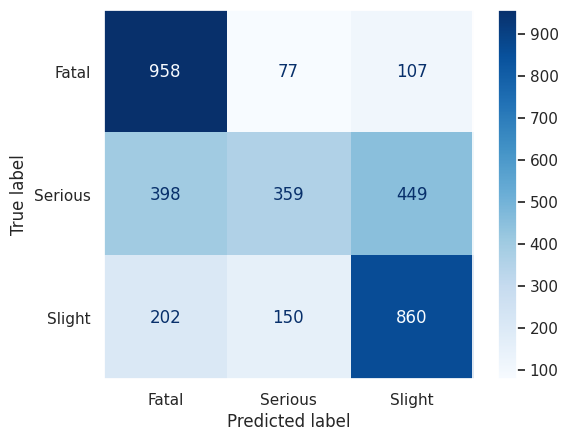

In [ ]:
#SVC Classsfier 
 # Create Decison Tree object
obj= RandomForestClassifier(n_estimators=10, max_depth=4, random_state=0)
#obj = SVC(kernel= 'poly', degree= 4, random_state=0)  
#obj = SVC(C= 2, kernel= 'rbf', random_state=0)
# Train the model using the training sets
obj.fit(X_train,Y_train)

#Validate
Y_valid_pred= model.predict(X_valid)

# Make predictions using the testing set
Y_test_pred = obj.predict(X_test)

# The accuracy score: 1 for perfect prediction
print('Accuracy on Validation: {:.4f}'.format(sklearn.metrics.accuracy_score(Y_valid, Y_valid_pred)))   
print('Accuracy on Test: {:.4f}'.format(sklearn.metrics.accuracy_score(Y_test, Y_test_pred)))
print('f1 on Test: {:.4f}'.format(sklearn.metrics.f1_score(Y_test, Y_test_pred,average='weighted' )))
print(f'\n Balanced accuracy is {balanced_accuracy_score(Y_test, Y_test_pred)}')
# Confusion matrix
confusion_mat = sklearn.metrics.confusion_matrix(Y_test, Y_test_pred) #normalize='all')
print('Confusion matrix: ', confusion_mat)
# Visualize the confusion matrix
sklearn.metrics.ConfusionMatrixDisplay(confusion_mat, display_labels=['Fatal', 'Serious','Slight']).plot(cmap=plt.cm.Blues)
plt.grid(False)
# The classification report, which contains accuracy, precision, recall, F1 score
print(sklearn.metrics.classification_report(Y_test, Y_test_pred))

# Classification using neural networks

In [ ]:
!pip install scikeras[tensorflow]
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.optimizers import SGD # We will be using the SGD optimiser today, though there are other options you may want to explore (such as Adam)
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy  # We will be using TFs MSE loss function for regression and BinaryCross Entropy for classification.
from tensorflow.keras.layers import Input, Dense, Dropout # The layers we will be using to construct our network.
from tensorflow.keras.regularizers import L1, L2 # Regularisation being used in model layers
from tensorflow.keras.metrics import BinaryAccuracy # Accuracy Metric for classification
from tensorflow.keras.callbacks import EarlyStopping 
from tensorflow.keras.activations import sigmoid, linear, relu, softmax 
from tensorflow.keras.models import Model, Sequential
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, classification_report, balanced_accuracy_score # Various classification metrics we may find useful


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
train_dataset, test_dataset, train_labels, test_labels = train_test_split(X_raw, Y, 
                                                                          stratify = Y, #we use a stratified division to make sure we keep the same proportion of target labels in both the training and the test dataset (see data imbalance below)
                                                                          test_size= 0.2)

scaler = StandardScaler()
scaler.fit(train_dataset)
X_train_preprocessed = scaler.transform(train_dataset)
X_test_preprocessed = scaler.transform(test_dataset)

In [ ]:

def one_layer_model(num_of_input_features, hidden_layer_nodes=20):
    """ 
    We wrap the model into a function for better usability.
    We make some of the important hyper-parameters, like the learning rate, 
    as arguments to the function. This way we can test different values for these
    hyperparameters without having to change the hard-coded model itself.
    """
    # create a simple model with ONE hidden layer only
    model = models.Sequential()
    # we create a hidden layer with 20 nodes. 
    # Here we can directly give it the input shape. Otherwise we can also create a separate input layer
    model.add(layers.Dense(hidden_layer_nodes, input_dim=num_of_input_features, activation='relu'))
    model.add(layers.Dense(5, activation='softmax')) #is it clear why here we use "sigmoid" and use "softmax" for multi-class problems?
    return model

clf = KerasClassifier(
    model=one_layer_model,
    loss="sparse_categorical_crossentropy",
    model__hidden_layer_nodes=20,
    num_of_input_features= X_train_preprocessed.shape[1],
    epochs= 70,
    batch_size= 70,
    verbose= 0,
    validation_split= 0.2,
    optimizer = "adam",
    optimizer__learning_rate = 0.001,
)

params = {
    'optimizer__learning_rate': [0.01, 0.001],
    'model__hidden_layer_nodes': [1,10,20],
}

gs = GridSearchCV(clf, params, scoring='balanced_accuracy', verbose=True)

gs.fit(X_train_preprocessed, train_labels)

print(gs.best_score_, gs.best_params_)



Fitting 5 folds for each of 6 candidates, totalling 30 fits
0.6221467472685929 {'model__hidden_layer_nodes': 20, 'optimizer__learning_rate': 0.001}


              precision    recall  f1-score   support

           0       0.63      0.85      0.72      1186
           1       0.40      0.67      0.50      1187
           2       0.00      0.00      0.00      1187

    accuracy                           0.50      3560
   macro avg       0.34      0.50      0.41      3560
weighted avg       0.34      0.50      0.41      3560

f1 on Test: 0.4083


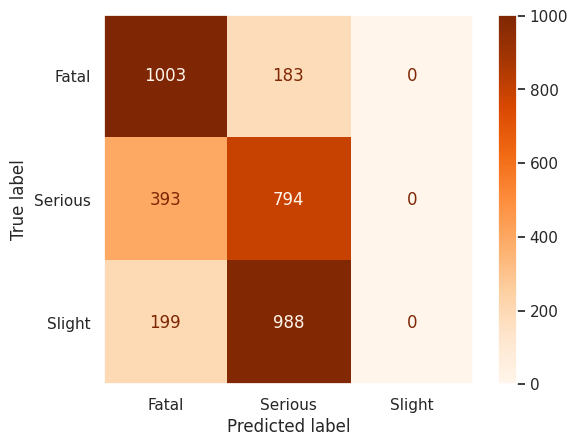

In [ ]:
# Check performance on test data
test_probabilities = gs.best_estimator_.predict(X_test_preprocessed)
test_predictions = test_probabilities > .5

# let's show the classification report with all the metrics
# think about which metrics you think are the most important ones for this problem!
print(classification_report(test_labels,test_predictions)) # this is to give the real categories, not their encoded numbers
print('f1 on Test: {:.4f}'.format(sklearn.metrics.f1_score(test_labels, test_predictions,average='weighted' )))

disp = ConfusionMatrixDisplay(confusion_matrix(test_labels, test_predictions,),display_labels=['Fatal', 'Serious', 'Slight'])
disp.plot(cmap=plt.cm.Oranges)
plt.grid(False)     